In [254]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [255]:
from cifar_utils import get_datasets, plot
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader

In [256]:
FOLDER = ".//data//cifar//"
training_set, validation_set = get_datasets(FOLDER)
print(len(training_set), len(validation_set))

50000 10000


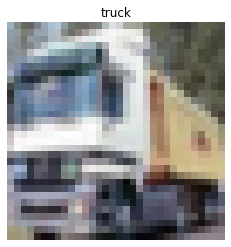

In [257]:
plot(training_set.get_image(1), training_set.get_label(1))

In [258]:
training_gen = DataLoader(training_set, batch_size=32, shuffle=True, num_workers=4)
valid_gen = DataLoader(validation_set, batch_size=len(validation_set))

In [259]:
net = nn.Sequential(nn.Conv2d(3, 4, 3), nn.ReLU(), nn.Flatten(), nn.Linear(3600, 10))
crit = nn.CrossEntropyLoss() # WHAT DOES IT EXPECT!!
opt = optim.Adam(net.parameters())

In [260]:
def fit(net, crit, opt, train, val, n_epochs=1):
    for epoch in range(n_epochs):
        epoch_loss = []
        val_loss = []
        for X, y in train:
            opt.zero_grad()
            p = net(X)
            loss = crit(p, y)
            epoch_loss.append(loss)
            loss.backward()
            opt.step()
        with torch.no_grad():
            for X, y in val:
                p = net(X)
                val_loss.append(crit(p, y))
        print(f"Epoch:{epoch}, T Loss:{np.mean(epoch_loss)}, V Loss:{np.mean(val_loss)}")

In [261]:
fit(net, crit, opt, training_gen, valid_gen)

RuntimeError: expected scalar type Long but found Int

In [215]:
X = np.load(".//data//cifar//X.npy")

In [216]:
X.shape

(60000, 3072)

In [218]:
X[1]

array([154, 126, 105, ..., 139, 142, 144], dtype=uint8)

In [120]:
X = X.reshape(-1, 3, 32 ,32)

In [125]:
np.mean(X, (0,2,3))

array([125.426544, 123.07661 , 114.03091 ], dtype=float32)

In [219]:
m = training_set.transform.mean

In [212]:
training_set.transform.std

[62.977604, 62.064114, 66.70635]

In [220]:
m

[125.426544, 123.07661, 114.03091]

In [223]:
d = np.repeat(m, 32*32).reshape(3, 32, 32)

In [ ]:
a = 